# Exercises: Data Analysis with Python

In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt

# Minor Planets
You are going to analyse the orbital data for some 1.5 million minor planets in our solar system using polars ([pola.rs](https://pola.rs/)), a fast and efficient library to work with large datasets.

#### Reading data
The code segment below reads the data from a text file. The format of the data in the text file is described in https://minorplanetcenter.net/iau/info/MPOrbitFormat.html. We are only interested in two columns, the eccentricity and the semi-major axis.

In [4]:
mp = pl.read_csv(
    "data/mpcorb.txt",
    has_header = False,
    skip_rows = 45,
    new_columns = ['full_str']
)

column_names = [ 'ecc', 'a' ] # major semi axis

slice_tuples = [(71, 9), (93, 11)]

data = mp.with_columns(
    [
        pl.col('full_str').str.slice(slice_tuple[0], slice_tuple[1]).str.strip_chars().cast(pl.Float32).alias(col)
        for slice_tuple, col in zip(slice_tuples, column_names)
    ]
).drop('full_str')

#### Histograms
Make a histogram of the minor planets with a distance of up to 6 astronomical units from the sun. Add vertical lines at the positions of the first six planets (Mercury to Jupiter).

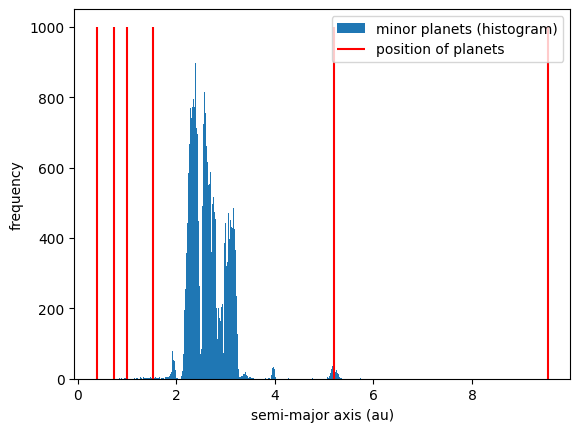

In [5]:
planets = np.array([0.3871, 0.7233, 1.000, 1.5273, 5.2028, 9.5388])

lower = 0
upper = 6
plot_data = data.filter(pl.col('a') < upper).filter(pl.col('a') > lower)

nbins = 1000
plt.hist(plot_data.select('a'), bins=nbins, label='minor planets (histogram)')
plt.xlabel('semi-major axis (au)')
plt.ylabel('frequency')
plt.vlines(planets, 0, 1000, color='red', label='position of planets')
plt.legend()
plt.show()

Make a histogram for the eccentricities of the minor planets.

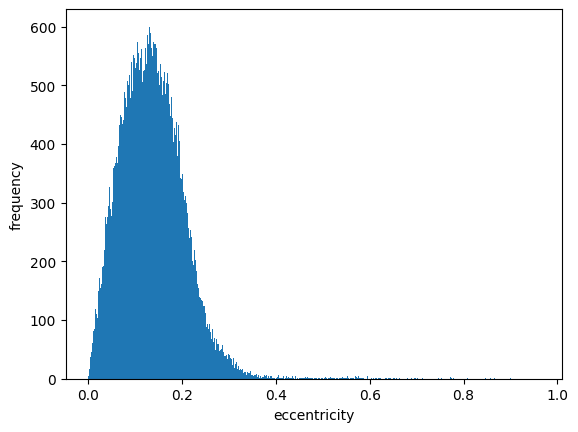

In [6]:
nbins = 1000
plt.hist(data.select('ecc'), bins=nbins)
plt.xlabel('eccentricity')
plt.ylabel('frequency')
plt.show()

Graph the eccentricity vs the semi-major axis for the minor planets.

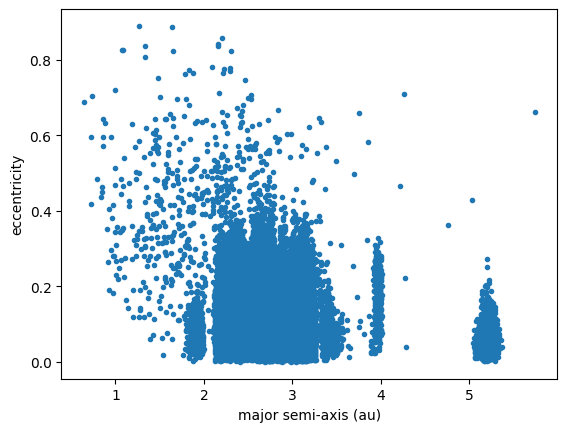

In [7]:
lower = 0
upper = 6
plot_data = data.filter(pl.col('a') < upper).filter(pl.col('a') > lower)

plt.scatter(plot_data.select('a'), plot_data.select('ecc'), marker='.')
plt.xlabel('major semi-axis (au)')
plt.ylabel('eccentricity')
plt.show()